In [1]:
import pandas as pd
import numpy as np
import json
import warnings
import matplotlib as mlp
import matplotlib.pyplot as plt
import timeit


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [2]:
with open('hh_ru1.json', 'r') as file:
    json_data = json.load(file)

In [3]:
df = pd.json_normalize(json_data)
df = df.drop([
    'relations', 'working_days','addition_info.specializations',

    'accept_incomplete_resumes','accept_temporary', 'adv_context', 'adv_response_url', 'alternate_url', 'apply_alternate_url', 'archived',
    'contacts', 'department', 'has_test', 'insider_interview', 'is_adv_vacancy', 'premium', 'sort_point_distance', 'response_letter_required',
    'response_url', 'show_logo_in_search', 'url','working_time_intervals','working_time_modes',    
    'addition_info.accept_handicapped', 'addition_info.accept_incomplete_resumes','addition_info.accept_kids','addition_info.accept_temporary',
    'addition_info.address.building','addition_info.address.description','addition_info.address.lat','addition_info.address.lng','addition_info.address.metro',
    'addition_info.address.metro_stations','addition_info.allow_messages','addition_info.address.street', 'addition_info.alternate_url',
    'addition_info.apply_alternate_url','addition_info.approved','addition_info.archived','addition_info.area.id',
    'addition_info.area.url', 'addition_info.billing_type.id' ,'addition_info.code','addition_info.contacts','addition_info.created_at',
    'addition_info.department','addition_info.driver_license_types', 'addition_info.driver_license_types','addition_info.employer.alternate_url',
    'addition_info.employer.id','addition_info.employer.logo_urls.240','addition_info.employer.logo_urls.90','addition_info.employer.logo_urls.original',
    'addition_info.employer.trusted', 'addition_info.employer.url', 'addition_info.employer.vacancies_url','addition_info.employment.id', 
    'addition_info.experience.name','addition_info.has_test','addition_info.hidden','addition_info.id','addition_info.initial_created_at',
    'addition_info.insider_interview','addition_info.negotiations_url', 'addition_info.premium','addition_info.published_at','addition_info.quick_responses_allowed',
    'addition_info.relations','addition_info.response_letter_required', 'addition_info.response_url','addition_info.salary', 'addition_info.schedule.id',
    'addition_info.suitable_resumes_url','addition_info.test', 'addition_info.type.id', 'addition_info.type.name','addition_info.vacancy_constructor_template',
    'addition_info.working_time_intervals','addition_info.working_days','addition_info.working_time_modes','address.building','address.description',
    'address.id','address.lat','address.lng','address.metro','address.metro_stations','address.street','area.id','area.url','employer.alternate_url',
    'employer.id','employer.logo_urls.240','employer.logo_urls.90','employer.logo_urls.original','employer.trusted','type.id','type.name',
    'employer.url','employer.vacancies_url','employment.id','employment.name','experience.id',
    'addition_info.salary.from','addition_info.salary.gross','schedule.id','address','addition_info.address','addition_info.address.metro.lat','addition_info.address.metro.line_id',
    'addition_info.address.metro.lng','addition_info.address.metro.station_id','addition_info.address.metro.station_name','addition_info.department.id',
    'address.metro.lat','address.metro.line_id','address.metro.line_name','address.metro.lng','address.metro.station_id',
    'addition_info.salary.to','addition_info.salary.currency','addition_info.schedule.name', 'salary', 'addition_info.employer.accredited_it_employer',
    'addition_info.address.metro.line_name','addition_info.department.name','branding.tariff','department.id','addition_info.insider_interview.id',
    'addition_info.insider_interview.url','insider_interview.id','insider_interview.url','addition_info.vacancy_constructor_template.bottom_picture',
    'addition_info.vacancy_constructor_template.id','addition_info.vacancy_constructor_template.name','addition_info.vacancy_constructor_template.top_picture.blurred_path',
    'addition_info.vacancy_constructor_template.top_picture.height','addition_info.vacancy_constructor_template.top_picture.path','addition_info.vacancy_constructor_template.top_picture.width',
    'addition_info.employer.logo_urls','employer.logo_urls','addition_info.vacancy_constructor_template.bottom_picture.blurred_path','addition_info.vacancy_constructor_template.bottom_picture.height',
    'addition_info.vacancy_constructor_template.bottom_picture.path','addition_info.vacancy_constructor_template.bottom_picture.width','brand_snippet.background.color','brand_snippet.background.gradient',
    'brand_snippet.logo','brand_snippet.logo_scalable.default.height','brand_snippet.logo_scalable.default.url','brand_snippet.logo_scalable.default.width',
    'brand_snippet.logo_scalable.xs.height','brand_snippet.logo_scalable.xs.url','brand_snippet.logo_scalable.xs.width','brand_snippet.logo_xs',
    'brand_snippet.picture','brand_snippet.picture_scalable.default.height','brand_snippet.picture_scalable.default.url',
    'brand_snippet.picture_scalable.xs.height','brand_snippet.picture_scalable.xs.url', 'brand_snippet.picture_scalable.xs.width','brand_snippet.picture_xs',
    'addition_info.test.required','addition_info.video_vacancy.cover_picture.resized_height','addition_info.video_vacancy.cover_picture.resized_path','addition_info.video_vacancy.cover_picture.resized_width',
    'brand_snippet.picture_scalable.default.width','addition_info.video_vacancy.video_url',
    'addition_info.billing_type.name', 'addition_info.address.city', 'addition_info.address.raw','addition_info.area.name','experience.name',
    'address.raw',
    'created_at',
    'published_at',
    'addition_info.name',
], axis=1)
df.set_index('id')

df.head()

,id,name,professional_roles,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,addition_info.key_skills,addition_info.languages,addition_info.professional_roles,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name
0,106197099,C++ developer with relocation to Berlin,"[{'id': '96', 'name': 'Программист, разработчи...",<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,"[{'name': 'C/C++'}, {'name': 'Английский язык'}]",[],"[{'id': '96', 'name': 'Программист, разработчи...",Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN
1,105950860,"Аналитик данных, Data analysis. Мастер Excel","[{'id': '107', 'name': 'Руководитель проектов'}]",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,"[{'name': 'Разработка бизнес-требований'}, {'n...",[],"[{'id': '107', 'name': 'Руководитель проектов'}]",NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN
2,104468824,Бизнес-аналитик (Global),"[{'id': '150', 'name': 'Бизнес-аналитик'}]",<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...","[{'id': 'eng', 'level': {'id': 'b2', 'name': '...","[{'id': '150', 'name': 'Бизнес-аналитик'}]",Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция
3,105382430,Junior Data Scientist,"[{'id': '96', 'name': 'Программист, разработчи...",<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,[],[],"[{'id': '96', 'name': 'Программист, разработчи...",NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов
4,105516822,"Специалист по работе с клиентами (удаленно, бе...","[{'id': '83', 'name': 'Оператор call-центра, с...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",[],"[{'id': '83', 'name': 'Оператор call-центра, с...",NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN


In [4]:
df['role'] = df['professional_roles'].apply(lambda x: x[0]['name'])
df = df.drop(['professional_roles'],axis=True)
df.head()

,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,addition_info.key_skills,addition_info.languages,addition_info.professional_roles,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,"[{'name': 'C/C++'}, {'name': 'Английский язык'}]",[],"[{'id': '96', 'name': 'Программист, разработчи...",Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик"
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,"[{'name': 'Разработка бизнес-требований'}, {'n...",[],"[{'id': '107', 'name': 'Руководитель проектов'}]",NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...","[{'id': 'eng', 'level': {'id': 'b2', 'name': '...","[{'id': '150', 'name': 'Бизнес-аналитик'}]",Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,[],[],"[{'id': '96', 'name': 'Программист, разработчи...",NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик"
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,"[{'name': 'Пользователь ПК'}, {'name': 'Грамот...",[],"[{'id': '83', 'name': 'Оператор call-центра, с...",NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц..."


#### Колонки с объектами скилов и ролей трансформируем в списки наименований

In [5]:
df['key_skills'] = df['addition_info.key_skills'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.key_skills'],axis=True)

df['roles'] = df['addition_info.professional_roles'].apply(lambda x: list(map(lambda y: y['name'], x)))
df = df.drop(['addition_info.professional_roles', 'roles'],axis=True)
df.head()

,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,addition_info.languages,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role,key_skills
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,[],Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]"
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,[],NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада..."
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,"[{'id': 'eng', 'level': {'id': 'b2', 'name': '...",Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке..."
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,[],NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[]
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,[],NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком..."


#### Нормализуем колонку с ин.языками

In [6]:
df['languages'] = df['addition_info.languages'].apply(lambda x: list(map(lambda y: y['id'], x)))
df = df.drop(['addition_info.languages'],axis=True)
df.head()


,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,salary.currency,salary.from,salary.gross,salary.to,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role,key_skills,languages
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,EUR,7500.0,True,10834.0,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",[]
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,KZT,300000.0,False,500000.0,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",[]
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,NaN,NaN,NaN,NaN,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",[eng]
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,NaN,NaN,NaN,NaN,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],[]
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,RUR,40000.0,False,60000.0,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",[]


#### Конвертируем колонки с зарплатами в рубли

##### Получим актуальный курс валют по отношению к рублю

In [7]:
import requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/RUB')
if response.status_code == 200:
    data = response.json()
    currency_data = data['rates']
else:
    raise Error('Ошибка при получении данных:', response.status_code)

In [8]:
def convert_salary(currency, salary):
    if 'RUR' == currency or 'RUB' == currency:
        return salary
    if None != currency and None != salary:
        k = currency_data.get(currency)
        if None != k:
            return salary / k
    return None

df['salary'] = df.apply(lambda x: convert_salary(x['salary.currency'], x['salary.to']), axis=1)
df = df.drop([
    'salary.to', 'salary.from', 'salary.currency', 'salary.gross',
], axis=True)


In [9]:
df.head()

,id,name,addition_info.description,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,snippet.requirement,snippet.responsibility,address.metro.station_name,branding.type,department.name,role,key_skills,languages,salary
0,106197099,C++ developer with relocation to Berlin,<p><strong>Do you believe in beauty when it co...,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",[],1.113464e+06
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",<p><strong>Эксперт по автоматизации данных и E...,AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",[],9.652510e+04
2,104468824,Бизнес-аналитик (Global),<p> </p> <p>Ищем человека в нашу международную...,Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,"Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",[eng],NaN
3,105382430,Junior Data Scientist,<p><em>Дивизион &quot;Моделирование и исследов...,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],[],NaN
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",<p><strong>IDF Eurasia специализируется на dat...,IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",[],6.000000e+04


#### Удаляем html теги из колонок с описанием

In [10]:
import re
def cleanhtml(text):
    TAG_RE = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    if None != text:
        return TAG_RE.sub('', text)
    return text


df['description'] = df.apply(lambda x: cleanhtml(x['addition_info.description']), axis=1)
df['description_requirement'] = df.apply(lambda x: cleanhtml(x['snippet.requirement']), axis=1)
df['description_responsibility'] = df.apply(lambda x: cleanhtml(x['snippet.responsibility']), axis=1)

df = df.drop(['addition_info.description', 'snippet.requirement', 'snippet.responsibility'],axis=True)
df.head()

,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,key_skills,languages,salary,description,description_requirement,description_responsibility
0,106197099,C++ developer with relocation to Berlin,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",[],1.113464e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",[],9.652510e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн..."
2,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",[eng],NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...
3,105382430,Junior Data Scientist,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],[],NaN,Дивизион Моделирование и исследование данных о...,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""..."
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",[],6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...


#### Формируем фичу, где требуется знание английского

In [11]:
def check_eng(arr):
    if 'eng' in arr:
        return True
    return False


df['need_eng'] = df.apply(lambda x: check_eng(x['languages']), axis=1)
df = df.drop(['languages'],axis=True)
df.head()

,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,key_skills,salary,description,description_requirement,description_responsibility,need_eng
0,106197099,C++ developer with relocation to Berlin,think-cell,Полная занятость,noExperience,Берлин,Санкт-Петербург,False,think-cell,Полный день,NaN,NaN,NaN,"Программист, разработчик","[C/C++, Английский язык]",1.113464e+06,Do you believe in beauty when it comes to prog...,Our team of Developers consists of a wide rang...,A working environment that makes this team sta...,False
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,"[Разработка бизнес-требований, Постановка зада...",9.652510e+04,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",False
2,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,"[SQL, Python, Математическая статистика, Марке...",NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,True
3,105382430,Junior Data Scientist,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,NaN,MAKEUP,Сбер для экспертов,"Программист, разработчик",[],NaN,Дивизион Моделирование и исследование данных о...,"Понимание принципов разработки, внедрения и со...","Дивизион ""Моделирование и исследование данных""...",False
4,105516822,"Специалист по работе с клиентами (удаленно, бе...",IDF Eurasia,Полная занятость,noExperience,NaN,Саратов,False,IDF Eurasia,Удаленная работа,NaN,MAKEUP,NaN,"Оператор call-центра, специалист контактного ц...","[Пользователь ПК, Грамотная речь, Работа в ком...",6.000000e+04,"IDF Eurasia специализируется на data science, ...",Владеешь ПК на уверенном уровне. -Грамотно и в...,Проводишь переговоры с действующими клиентами ...,False


#### Фильтруем скилы, оставим только те вакансии, в которых есть упоминание о ключевых словах в DS

In [12]:

keywords = [
    "машинное обучение",
    "глубокое обучение",
    "обработка естественного языка",
    "анализ данных",
    "большие данные",
    "Python",
    "R",
    "SQL",
    "TensorFlow",
    "PyTorch",
    "Scikit-learn",
    "Pandas",
    "NumPy",
    "Matplotlib",
    "Seaborn",
    "статистика",
    "регрессия",
    "классификация",
    "кластеризация",
    "нейронные сети",
    "гиперпараметры",
    "кросс-валидация",
    "обучение с учителем",
    "обучение без учителя",
    "обучение с подкреплением",
    "временные ряды",
    "анализ временных рядов",
    "Hadoop",
    "Spark",
    "дата-сайенс",
    "интерпретируемость моделей",
    "этика в ИИ",
    "применение ИИ в бизнесе",
    "дата-аналитика",
    "инструменты BI (Business Intelligence)",
    "дата-майнинг",
    "программирование на Python",
    "графовые модели",
    "DevOps для Data Science",
    "Jupyter Notebook",
    "Data Science",
    "Ml engineer",
    "Data engineer",
    "Data Scientist",
    "Computer Vision",
    "ML разработчик",
    "ML инженер",
    "Data инженер",
    "Машинное обучение",
    "Искусственный интеллект",
    "Нейронные сети",
    "Глубокое обучение",
    "Анализ данных",
    "Научный сотрудник по данным",
    "Инженер по данным",
    "Специалист по машинному обучению",
    "Моделирование",
    "Обработка естественного языка",
    "Компьютерное зрение",
    "TensorFlow",
    "PyTorch",
    "Scikit-learn",
    "Визуализация данных",
    "Обучение с учителем",
    "Обучение без учителя",
    "Обучение с подкреплением",
    "Математическое моделирование"
]
keywords = list(map(lambda x: x.lower(), keywords))

def filter_skill(skills):
    filtered_skills = list()
    for i in range(len(skills)):
        if skills[i].lower() in keywords:
            filtered_skills.append(skills[i].lower())
    return filtered_skills
df['skills'] = df.apply(lambda x: filter_skill(x['key_skills']), axis=1)
df = df.drop(['key_skills'], axis=True)
df = df[df['skills'].apply(len) > 0]
df.head()

,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,salary,description,description_requirement,description_responsibility,need_eng,skills
1,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,96525.096525,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",False,[data science]
2,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,True,"[sql, python]"
5,105464428,Инженер по машинному обучению (Исследователь в...,Open Media,Полная занятость,between1And3,NaN,Москва,True,Open Media,Удаленная работа,NaN,NaN,NaN,"Программист, разработчик",NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,False,"[python, data science, numpy, pytorch]"
9,105464431,Инженер по машинному обучению (Исследователь в...,Open Media,Полная занятость,between1And3,NaN,Нижний Новгород,True,Open Media,Удаленная работа,NaN,NaN,NaN,"Программист, разработчик",NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,False,"[python, data science, numpy, pytorch]"
10,106143231,Разработчик SQL,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,NaN,MAKEUP,Сбер. Data Science,"Программист, разработчик",NaN,Мы занимаемся разработкой программного обеспеч...,Навыки: SQL (Postgress ). Администрирование и ...,Мы занимаемся разработкой программного обеспеч...,False,"[sql, python]"


#### Применим One-Hot Encoding для ключевых скилов в DS

In [13]:
df_exploded = df.explode('skills')
df = df.drop(['skills'], axis=True)

dummies = pd.get_dummies(df_exploded['skills'], prefix='skill')
df2 = df_exploded.join(dummies).groupby('id').sum().reset_index()
df = pd.merge(df, df2, on='id', how='inner')
df.head()


,id,name,addition_info.employer.name,addition_info.employment.name,addition_info.experience.id,address.city,area.name,employer.accredited_it_employer,employer.name,schedule.name,address.metro.station_name,branding.type,department.name,role,salary_x,description,description_requirement,description_responsibility,need_eng_x,salary_y,need_eng_y,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика
0,105950860,"Аналитик данных, Data analysis. Мастер Excel",AlCom Engineering Group,Полная занятость,between3And6,NaN,Алматы,False,AlCom Engineering Group,Полный день,NaN,NaN,NaN,Руководитель проектов,96525.096525,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",False,96525.096525,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,104468824,Бизнес-аналитик (Global),Ozon,Полная занятость,between1And3,Москва,Москва,True,Ozon,Полный день,Деловой центр,MAKEUP,Ozon Офис и Коммерция,Бизнес-аналитик,NaN,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,True,0.000000,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
2,105464428,Инженер по машинному обучению (Исследователь в...,Open Media,Полная занятость,between1And3,NaN,Москва,True,Open Media,Удаленная работа,NaN,NaN,NaN,"Программист, разработчик",NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,False,0.000000,0,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105464431,Инженер по машинному обучению (Исследователь в...,Open Media,Полная занятость,between1And3,NaN,Нижний Новгород,True,Open Media,Удаленная работа,NaN,NaN,NaN,"Программист, разработчик",NaN,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,False,0.000000,0,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,106143231,Разработчик SQL,СБЕР,Полная занятость,between1And3,NaN,Москва,False,СБЕР,Полный день,NaN,MAKEUP,Сбер. Data Science,"Программист, разработчик",NaN,Мы занимаемся разработкой программного обеспеч...,Навыки: SQL (Postgress ). Администрирование и ...,Мы занимаемся разработкой программного обеспеч...,False,0.000000,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


#### Переименуем некоторые колонки

In [14]:
df['is_it_company'] = df['employer.accredited_it_employer']
df['employer_name'] = df['employer.name']
df['department_name'] = df['department.name']
df['salary'] = df['salary_x']
df['need_eng'] = df['need_eng_x']
df = df.drop(['employer.accredited_it_employer', 'addition_info.employer.name', 'department.name', 'employer.name',
              'salary_x','salary_y','need_eng_y','need_eng_x'
             ],axis=True)

#### Обработаем некоторые порядковые категориальные колонки

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['role'] = label_encoder.fit_transform(df['role'])
df['employment'] = label_encoder.fit_transform(df['addition_info.employment.name'])
df['experience'] = label_encoder.fit_transform(df['addition_info.experience.id'])
df['schedule'] = label_encoder.fit_transform(df['schedule.name'])
df['metro'] = label_encoder.fit_transform(df['address.metro.station_name'])
df['branding'] = label_encoder.fit_transform(df['branding.type'])
df = df.drop(['addition_info.employment.name', 'addition_info.experience.id', 'schedule.name', 'address.metro.station_name', 'branding.type'],axis=True)
df.head()

,id,name,address.city,area.name,role,description,description_requirement,description_responsibility,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика,is_it_company,employer_name,department_name,salary,need_eng,employment,experience,schedule,metro,branding
0,105950860,"Аналитик данных, Data analysis. Мастер Excel",NaN,Алматы,18,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,AlCom Engineering Group,NaN,96525.096525,False,0,1,1,97,2
1,104468824,Бизнес-аналитик (Global),Москва,Москва,4,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,True,Ozon,Ozon Офис и Коммерция,NaN,True,0,0,1,26,1
2,105464428,Инженер по машинному обучению (Исследователь в...,NaN,Москва,13,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Open Media,NaN,NaN,False,0,0,2,97,2
3,105464431,Инженер по машинному обучению (Исследователь в...,NaN,Нижний Новгород,13,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Open Media,NaN,NaN,False,0,0,2,97,2
4,106143231,Разработчик SQL,NaN,Москва,13,Мы занимаемся разработкой программного обеспеч...,Навыки: SQL (Postgress ). Администрирование и ...,Мы занимаемся разработкой программного обеспеч...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,False,СБЕР,Сбер. Data Science,NaN,False,0,0,1,97,1


#### Применим One-Hot Encoding для города в адресе

In [16]:
def select_city(area_city, company_city):
    if None != area_city:
        return area_city
    return company_city
    
df['city'] = df.apply(lambda x: select_city(x['area.name'], x['address.city']), axis=1)
df['city'] = df['city'].str.lower()
df = df.drop(['area.name','address.city'], axis=True)
df['city'] = label_encoder.fit_transform(df['city'])

df.head()

,id,name,role,description,description_requirement,description_responsibility,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика,is_it_company,employer_name,department_name,salary,need_eng,employment,experience,schedule,metro,branding,city
0,105950860,"Аналитик данных, Data analysis. Мастер Excel",18,Эксперт по автоматизации данных и Excel-гуру М...,Глубокое понимание автоматизации процессов и в...,"Анализировать участки, где сбор данных затрудн...",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,AlCom Engineering Group,NaN,96525.096525,False,0,1,1,97,2,2
1,104468824,Бизнес-аналитик (Global),4,"Ищем человека в нашу международную команду, ...","Опыт работы с данными и BI системами, в приори...",1) Как влияют сроки доставки на решения покупа...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,True,Ozon,Ozon Офис и Коммерция,NaN,True,0,0,1,26,1,56
2,105464428,Инженер по машинному обучению (Исследователь в...,13,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Open Media,NaN,NaN,False,0,0,2,97,2,56
3,105464431,Инженер по машинному обучению (Исследователь в...,13,Ищем коллегу со знанием DSP в команду Audio ML...,Способный ML-специалист с опытом в audio / CV ...,Эксперименты с передовыми архитектурами. Вы бу...,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,Open Media,NaN,NaN,False,0,0,2,97,2,59
4,106143231,Разработчик SQL,13,Мы занимаемся разработкой программного обеспеч...,Навыки: SQL (Postgress ). Администрирование и ...,Мы занимаемся разработкой программного обеспеч...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,False,СБЕР,Сбер. Data Science,NaN,False,0,0,1,97,1,56


#### Подготовим текстовые фичи для обработки

In [17]:
def clean_text(text):
    if None == text:
        return ''
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['name'] = df['name'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)
df['description_requirement'] = df['description_requirement'].apply(clean_text)
df['description_responsibility'] = df['description_responsibility'].apply(clean_text)
df['employer_name'] = df['employer_name'].apply(clean_text)
# df['department_name'] = df['department_name'].apply(clean_text)

#### Пока удалим текстовые фичи

In [18]:
df = df.drop(['name','description','description_requirement', 'description_responsibility', 'department_name', 'employer_name',], axis=True)

In [19]:
df.head()

,id,role,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика,is_it_company,salary,need_eng,employment,experience,schedule,metro,branding,city
0,105950860,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,96525.096525,False,0,1,1,97,2,2
1,104468824,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,True,NaN,True,0,0,1,26,1,56
2,105464428,13,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,NaN,False,0,0,2,97,2,56
3,105464431,13,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,NaN,False,0,0,2,97,2,59
4,106143231,13,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,False,NaN,False,0,0,1,97,1,56


#### Заполним пропуски

In [20]:
df.columns[df.isna().any()].tolist()

['is_it_company', 'salary']

In [21]:
### Заполним средним
numeric_columns = df.loc[:,df.dtypes!='object'].columns
df['is_it_company'] = df['is_it_company'].fillna(df['is_it_company'].mean() > 0.5).astype(int)
df['need_eng'] = df['need_eng'].astype(int)
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
df.describe()


,role,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика,is_it_company,salary,need_eng,employment,experience,schedule,metro,branding,city
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,9.613705,0.125000,0.023343,0.200301,0.018072,0.283133,0.023343,0.059488,0.256777,0.261295,1.698795,0.309488,0.070783,0.080572,0.033886,0.245482,1.274096,0.167169,0.003765,0.170181,0.014307,0.008283,0.013554,0.065512,0.100151,0.011295,0.024096,0.003012,0.031627,0.329819,307677.283956,0.126506,0.139307,0.957078,1.225151,86.268072,1.519578,56.677711
std,6.742482,0.712283,0.277621,0.939271,0.287345,0.987313,0.360311,0.627371,1.142928,1.151759,1.484793,1.238603,0.527572,0.718146,0.510238,0.877575,1.369335,0.930472,0.098906,0.780093,0.237305,0.131391,0.254212,0.466916,0.678933,0.206945,0.328534,0.109764,0.350123,0.470324,58724.046655,0.332544,0.521741,0.846355,0.516262,24.274159,0.524811,19.567903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37037.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,307677.283956,0.000000,0.000000,0.000000,1.000000,97.000000,1.000000,56.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,307677.283956,0.000000,0.000000,1.000000,1.000000,97.000000,2.000000,56.000000
75%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,307677.283956,0.000000,0.000000,1.000000,2.000000,97.000000,2.000000,66.000000
max,30.000000,9.000000,4.000000,10.000000,8.000000,10.000000,8.000000,9.000000,10.000000,10.000000,10.000000,20.000000,8.000000,10.000000,9.000000,8.000000,10.000000,9.000000,3.000000,10.000000,6.000000,3.000000,7.000000,5.000000,8.000000,4.000000,6.000000,4.000000,4.000000,1.000000,925925.925926,1.000000,3.000000,3.000000,2.000000,97.000000,2.000000,107.000000


In [22]:
df.head()

,id,role,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика,is_it_company,salary,need_eng,employment,experience,schedule,metro,branding,city
0,105950860,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96525.096525,0,0,1,1,97,2,2
1,104468824,4,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,307677.283956,1,0,0,1,26,1,56
2,105464428,13,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,307677.283956,0,0,0,2,97,2,56
3,105464431,13,0,0,4,0,0,0,0,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,307677.283956,0,0,0,2,97,2,59
4,106143231,13,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,307677.283956,0,0,0,1,97,1,56


### Изучим корелляции вещественных признаков

In [23]:
df[numeric_columns].corr()

,role,skill_computer vision,skill_data engineer,skill_data science,skill_data scientist,skill_hadoop,skill_jupyter notebook,skill_matplotlib,skill_numpy,skill_pandas,skill_python,skill_pytorch,skill_r,skill_scikit-learn,skill_seaborn,skill_spark,skill_sql,skill_tensorflow,skill_анализ временных рядов,skill_анализ данных,skill_визуализация данных,skill_искусственный интеллект,skill_компьютерное зрение,skill_математическое моделирование,skill_машинное обучение,skill_моделирование,skill_нейронные сети,skill_обработка естественного языка,skill_статистика,salary,need_eng,employment,experience,schedule,metro,branding,city
role,1.000000,0.017437,-0.039866,-0.066189,-0.060184,-0.014802,-0.031647,-0.052640,-0.053615,-0.064139,-0.237302,-0.039454,-0.117722,-0.038700,-5.183007e-02,0.003175,-0.198370,0.001532,-0.031718,-0.127612,-0.037047,3.593865e-02,0.025040,-0.067596,-0.028253,-3.359565e-02,0.001144,-1.471841e-02,-8.675594e-02,6.724285e-03,0.026181,-0.206191,-0.151998,0.036046,0.010551,-0.005847,0.078151
skill_computer vision,0.017437,1.000000,-0.014767,0.219363,0.047865,-0.033219,0.062029,0.271716,0.193813,0.146628,0.280742,0.319993,-0.023563,-0.019704,3.242431e-01,-0.029838,-0.079194,0.358449,-0.006686,-0.038313,-0.010588,-1.107165e-02,0.227858,-0.004249,0.231212,-9.585661e-03,0.199659,-4.819316e-03,-1.586409e-02,-2.889709e-02,-0.006363,-0.010392,-0.033595,-0.049952,0.008346,0.078117,-0.008083
skill_data engineer,-0.039866,-0.014767,1.000000,-0.017944,0.164746,0.019858,-0.005452,-0.007979,-0.018905,-0.019090,0.044492,-0.021026,-0.011290,-0.009441,-5.588305e-03,-0.023538,0.082271,-0.015118,-0.003203,0.044276,-0.005073,-5.304772e-03,-0.004487,-0.011806,-0.012413,-4.592786e-03,-0.006172,-2.309083e-03,3.645316e-01,-5.332069e-03,-0.032011,0.102395,0.068411,0.078974,-0.003054,-0.031586,-0.012208
skill_data science,-0.066189,0.219363,-0.017944,1.000000,-0.002254,0.134639,-0.013826,0.281568,0.331118,0.286643,0.398300,0.348926,0.047404,0.170446,3.176050e-01,0.077437,0.171724,0.165150,-0.008124,0.287696,0.108845,1.097094e-02,-0.011379,0.025042,0.308852,5.038194e-02,0.106451,-5.856264e-03,-1.927748e-02,6.640250e-02,-0.020871,-0.049293,-0.072597,-0.032464,-0.014189,0.056246,0.000030
skill_data scientist,-0.060184,0.047865,0.164746,-0.002254,1.000000,-0.018050,-0.004078,-0.005968,0.132714,0.131449,0.083420,0.119784,-0.008445,0.226657,3.247724e-01,-0.017606,-0.058564,0.169078,-0.002396,0.046783,-0.003795,-3.967943e-03,-0.003356,-0.008831,0.052520,-3.435382e-03,-0.004616,-1.727183e-03,-5.685492e-03,2.188343e-02,-0.023944,-0.016806,-0.040189,0.013189,0.026963,-0.002348,0.035749
skill_hadoop,-0.014802,-0.033219,0.019858,0.134639,-0.018050,1.000000,0.116981,-0.027212,0.170594,0.250997,0.310104,0.113160,-0.038504,0.142105,-1.905915e-02,0.524192,0.314338,0.014064,-0.010925,0.106660,-0.017303,-1.809215e-02,-0.015302,-0.040267,0.098192,-1.566389e-02,-0.021049,-7.875226e-03,-2.592345e-02,-2.865130e-02,-0.079337,0.011148,0.010045,0.069994,0.026450,-0.081970,0.018574
skill_jupyter notebook,-0.031647,0.062029,-0.005452,-0.013826,-0.004078,0.116981,1.000000,-0.006148,0.131828,0.195934,0.146969,0.221888,-0.008699,0.283958,-4.305810e-03,0.019996,-0.011451,0.269321,-0.002468,-0.014144,0.137106,-4.087347e-03,-0.003457,-0.009097,-0.009564,-3.538759e-03,-0.004755,-1.779157e-03,-5.856580e-03,1.315238e-02,-0.024665,-0.017311,-0.028837,0.008185,-0.022170,-0.064189,-0.002673
skill_matplotlib,-0.052640,0.271716,-0.007979,0.281568,-0.005968,-0.027212,-0.006148,1.000000,0.446357,0.442563,0.317764,0.345775,0.132983,0.178357,6.599183e-01,-0.004644,0.074865,0.411539,-0.003612,0.054748,-0.005721,-5.982181e-03,-0.005060,-0.013314,-0.013998,-5.179276e-03,-0.006960,-2.603949e-03,-8.571604e-03,-9.675619e-03,-0.007202,-0.018430,-0.024991,0.033069,0.041953,0.009048,0.000888
skill_numpy,-0.053615,0.193813,-0.018905,0.331118,0.132714,0.170594,0.131828,0.446357,1.000000,0.800247,0.536743,0.568772,0.049819,0.490756,4.334696e-01,-0.035845,0.181784,0.447838,-0.008559,0.107315,-0.013555,-1

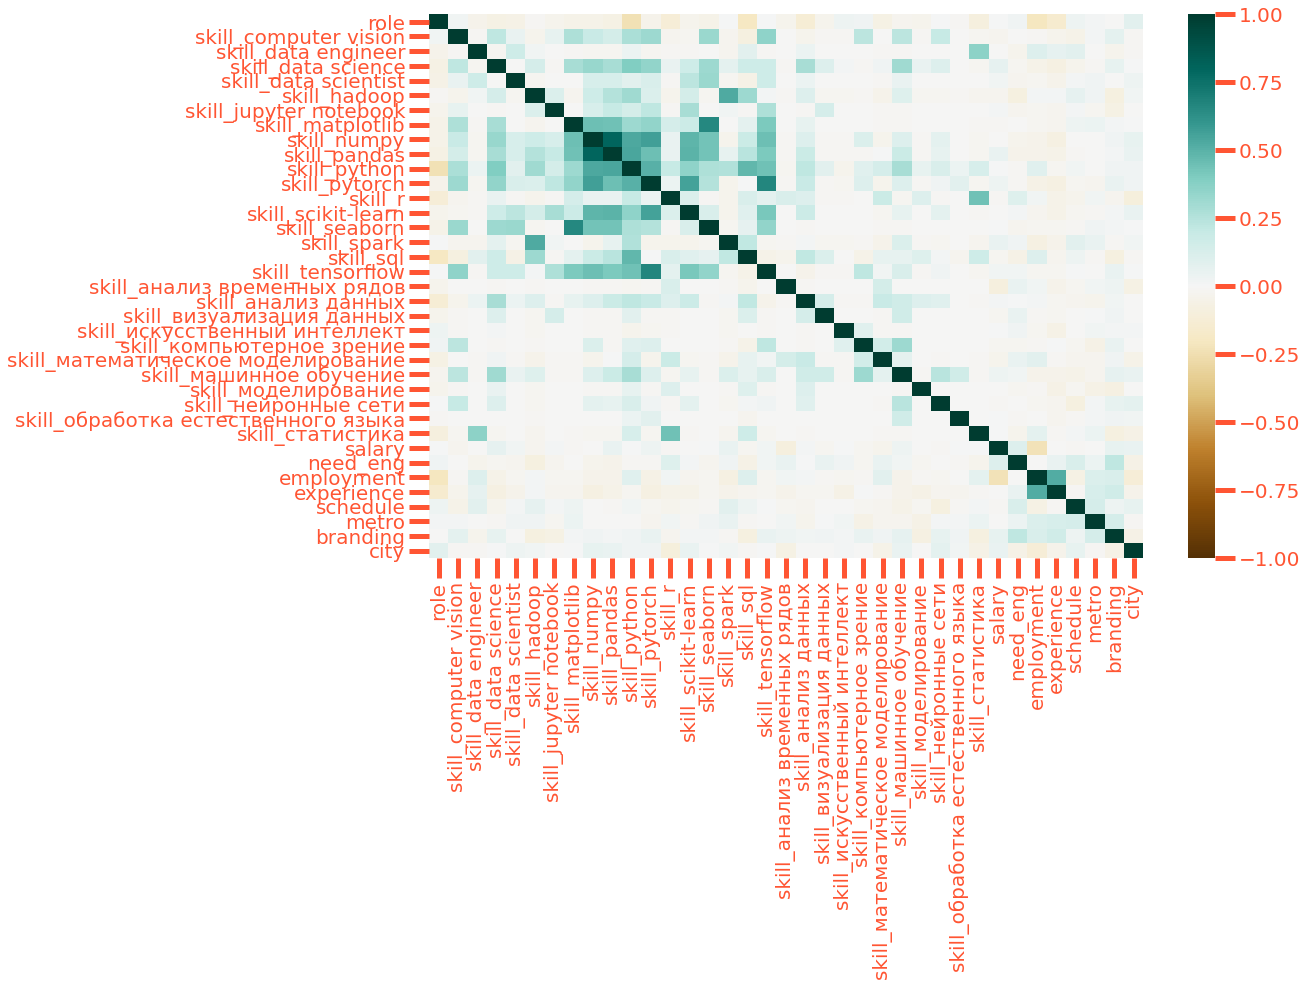

In [24]:
### Изобразим в виде Тепловой карты
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
sns.heatmap(df[numeric_columns].corr(), 
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)
plt.show()

In [25]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
skill_numpy       skill_pandas          0.800247
skill_pytorch     skill_tensorflow      0.668450
skill_matplotlib  skill_seaborn         0.659918
skill_numpy       skill_pytorch         0.568772
skill_pytorch     skill_scikit-learn    0.559052
skill_pandas      skill_python          0.545322
skill_numpy       skill_python          0.536743
skill_hadoop      skill_spark           0.524192
employment        experience            0.516985
skill_python      skill_pytorch         0.504332
dtype: float64


In [26]:
print(df['salary'].describe())

count      1328.000000
mean     307677.283956
std       58724.046655
min       37037.037037
25%      307677.283956
50%      307677.283956
75%      307677.283956
max      925925.925926
Name: salary, dtype: float64


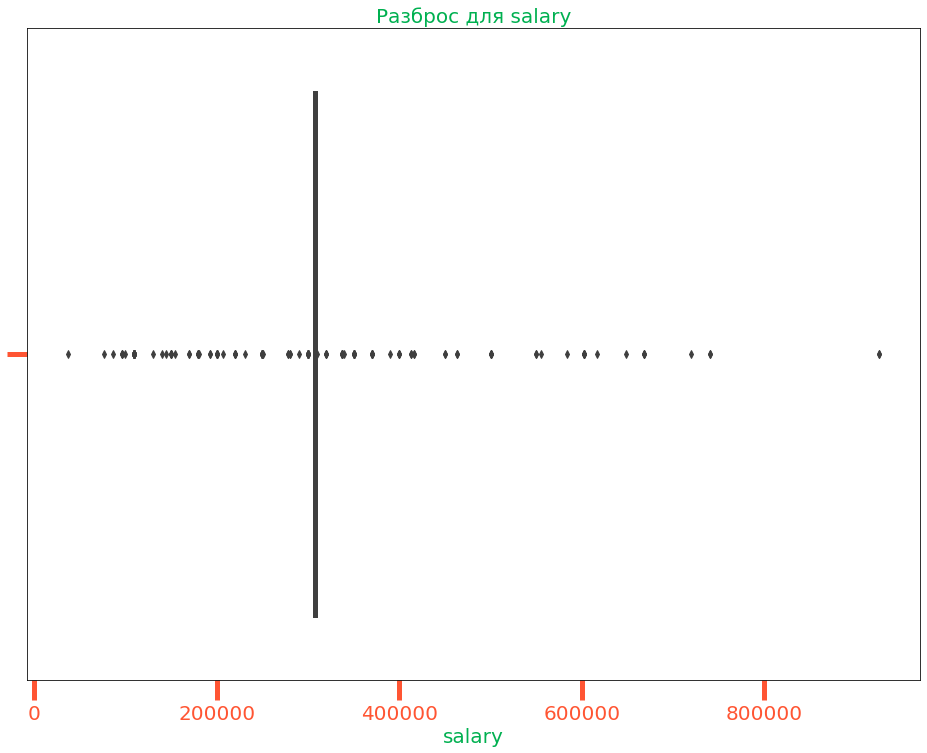

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.boxplot(x=df['salary'])
plt.title('Разброс для salary')
plt.show()

##### Уберем выбросы

In [28]:
print(df.shape)
df = df[(df['salary'] < 800000) & (df['salary'] > 60000)]
print(df.shape)

(1328, 39)
(1325, 39)


#### Пробуем обучить базовую модель

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

Y = df['salary']
X = df.drop(['salary'], axis=True)

learn_results = []

In [30]:
Y.describe()

count      1325.000000
mean     306948.335249
std       53132.711992
min       77220.077220
25%      307677.283956
50%      307677.283956
75%      307677.283956
max      740740.740741
Name: salary, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)


In [32]:
pipeline = Pipeline([
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: pipeline.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'LR', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': {}})

RMSE: 50186.13818015584
MAPE: 8.513278055076693


#### Пробуем подобрать параметры для LinearRegression

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('lr', LinearRegression())
])
param_grid = {
    'lr__fit_intercept': [True, False],
    'lr__normalize': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'SS+LR', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': grid_search.best_params_})

RMSE: 50186.13818015582
MAPE: 8.513278055076743


#### Пробуем обучить GradientBoostingRegressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor())
])
param_grid = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2], 
    'gb__max_depth': [3, 5, 7],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'SS+GBR', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': grid_search.best_params_})

RMSE: 44443.8271626157
MAPE: 5.5916378440544445


#### Пробуем обучить Ridge регрессию

In [35]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])
param_grid = {
    'ridge__alpha': np.logspace(-4, 4, 10)
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'SS+Ridge', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': grid_search.best_params_})

RMSE: 48728.907026227134
MAPE: 7.548941610298441


#### Пробуем обучить Lasso регрессию

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
param_grid = {
    'lasso__alpha': np.logspace(-4, 4, 10)
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

mape = mean_absolute_percentage_error(y_test, y_pred) * 100

learn_results.append({'model': 'SS+Lasso', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': grid_search.best_params_})

RMSE: 48052.7298387535
MAPE: 6.909221890887326


#### Попробуем обучить RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'SS+RFR', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': grid_search.best_params_})

RMSE: 48052.7298387535
MAPE: 6.909221890887326


#### Оценим результаты разных моделей

In [38]:
df = pd.DataFrame(learn_results)
df

,model,rmse,mape,inference_time,best_params
0,LR,50186.138180,8.513278,0.013133,{}
1,SS+LR,50186.138180,8.513278,0.018207,"{'lr__fit_intercept': True, 'lr__normalize': T..."
2,SS+GBR,44443.827163,5.591638,0.003453,"{'gb__learning_rate': 0.1, 'gb__max_depth': 3,..."
3,SS+Ridge,48728.907026,7.548942,0.018819,{'ridge__alpha': 166.81005372000558}
4,SS+Lasso,48052.729839,6.909222,0.019032,{'lasso__alpha': 1291.5496650148827}
5,SS+RFR,48052.729839,6.909222,0.010505,"{'rf__max_depth': None, 'rf__min_samples_leaf'..."


In [39]:
def render_report(df):
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['rmse'], color='skyblue')
    plt.title('RMSE models values')
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.xticks(fontsize='small')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['mape'], color='orange')
    plt.title('MAPE models values')
    plt.xlabel('Model')
    plt.ylabel('MAPE')
    plt.xticks(fontsize='small')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(16, 6))
    plt.bar(df['model'], df['inference_time'], color='green')
    plt.title('Inference time models values')
    plt.xlabel('Model')
    plt.ylabel('Inference time')
    plt.tight_layout()
    plt.xticks(fontsize='small')
    plt.show()

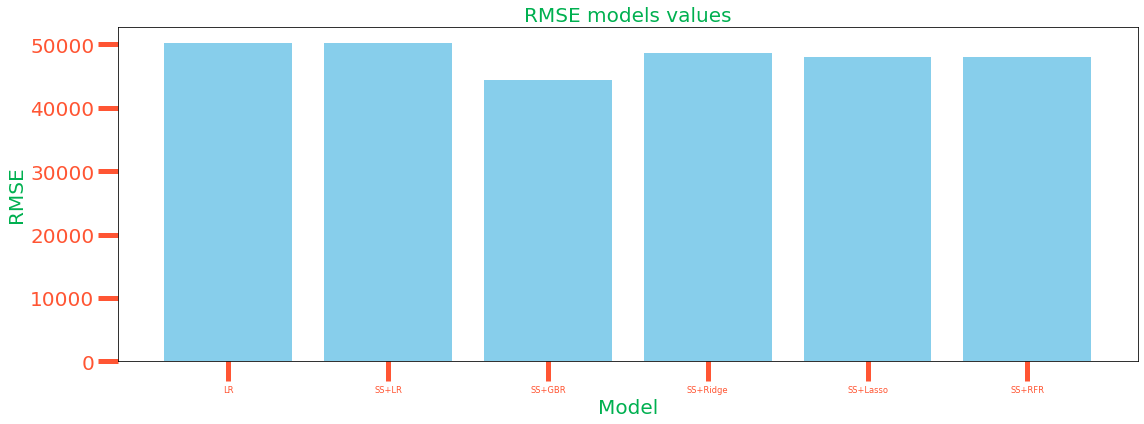

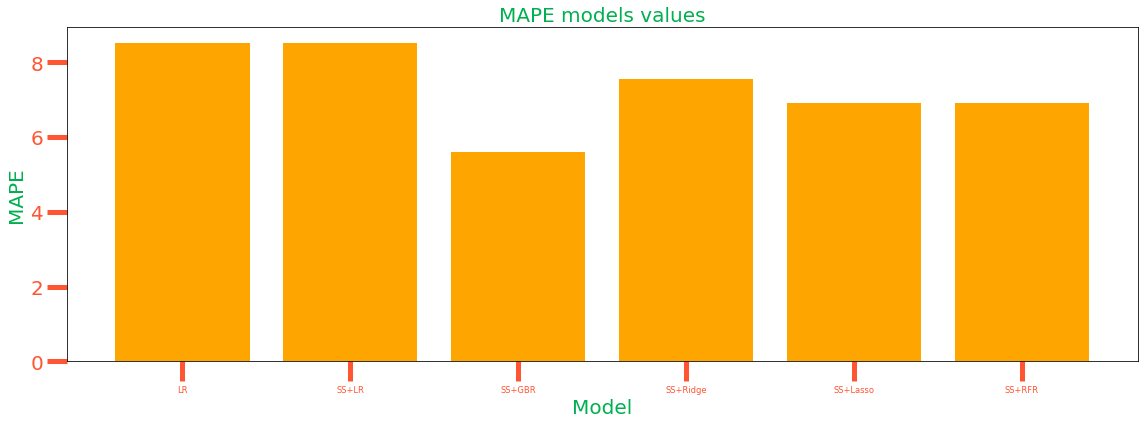

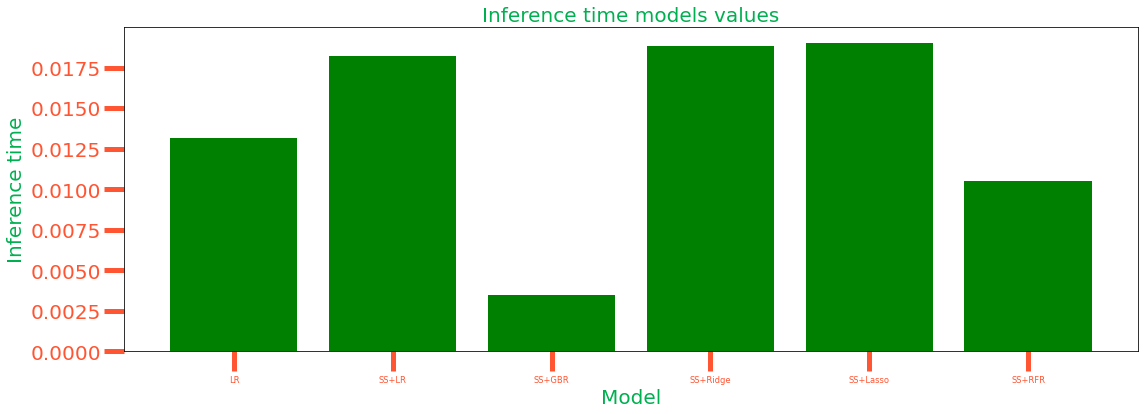

In [40]:
render_report(df)

#### Попробуем подобрать гиперапараметры для обучения GradientBoostingRegressor через optuna

In [41]:
!pip install optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [42]:
def study_callback(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 5, 7)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gb', GradientBoostingRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        ))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    return mean_absolute_percentage_error(y_test, y_pred)


study = optuna.create_study(direction='maximize')
study.optimize(study_callback, n_trials=100)

In [43]:
optuna_best_params = study.best_params
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(
        n_estimators=optuna_best_params['n_estimators'],
        learning_rate=optuna_best_params['learning_rate'],
        max_depth=optuna_best_params['max_depth'],
        min_samples_split=optuna_best_params['min_samples_split'],
        min_samples_leaf=optuna_best_params['min_samples_leaf']
    ))
])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'SS+GBR+optuna', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': optuna_best_params})

RMSE: 48985.08080216418
MAPE: 7.527156985787177


#### Попробуем подобрать гиперапараметры для обучения RandomForestRegressor через optuna

In [44]:
def study_callback_rfr(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42
        ))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    return mean_absolute_percentage_error(y_test, y_pred)


study_rfr = optuna.create_study(direction='maximize')
study_rfr.optimize(study_callback_rfr, n_trials=100)

In [45]:
optuna_best_params = study_rfr.best_params
best_model_rfr = RandomForestRegressor(
    n_estimators=optuna_best_params['n_estimators'],
    max_depth=optuna_best_params['max_depth'],
    min_samples_split=optuna_best_params['min_samples_split'],
    min_samples_leaf=optuna_best_params['min_samples_leaf'],
    max_features=optuna_best_params['max_features'],
    random_state=42
)
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model_rfr)
])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
avg_inference_time = timeit.timeit(lambda: best_model.predict(X_test), number=100) / 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

learn_results.append({'model': 'SS+RFR+optuna', 'rmse': rmse, 'mape': mape, 'inference_time': avg_inference_time, 'best_params': optuna_best_params})

RMSE: 48700.600118284936
MAPE: 6.584053968682977


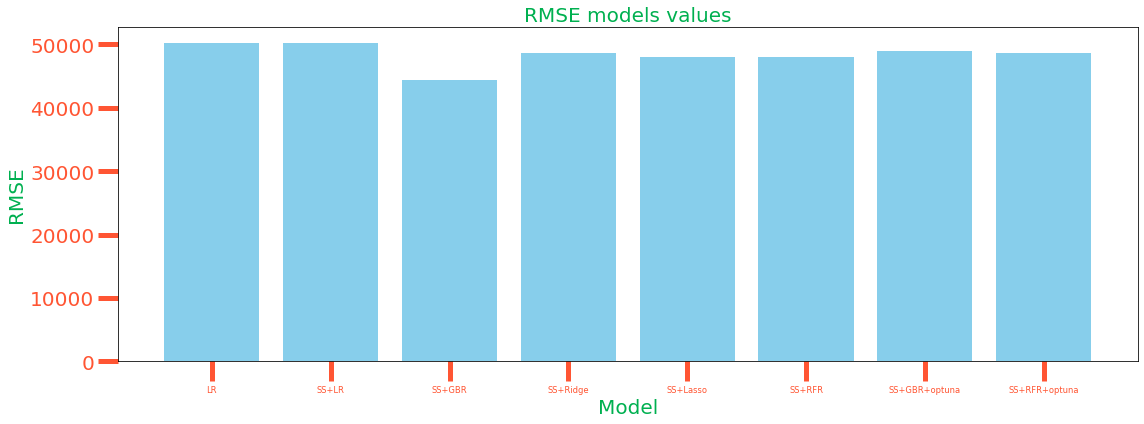

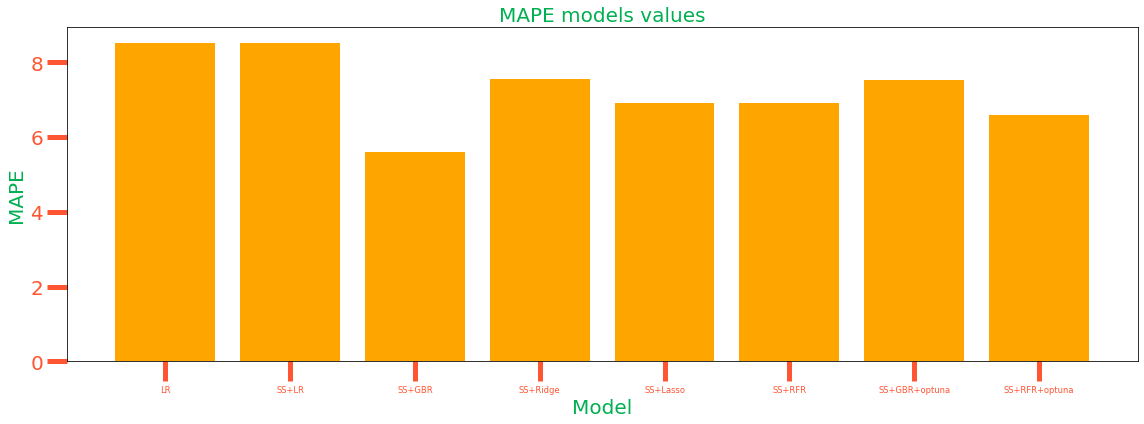

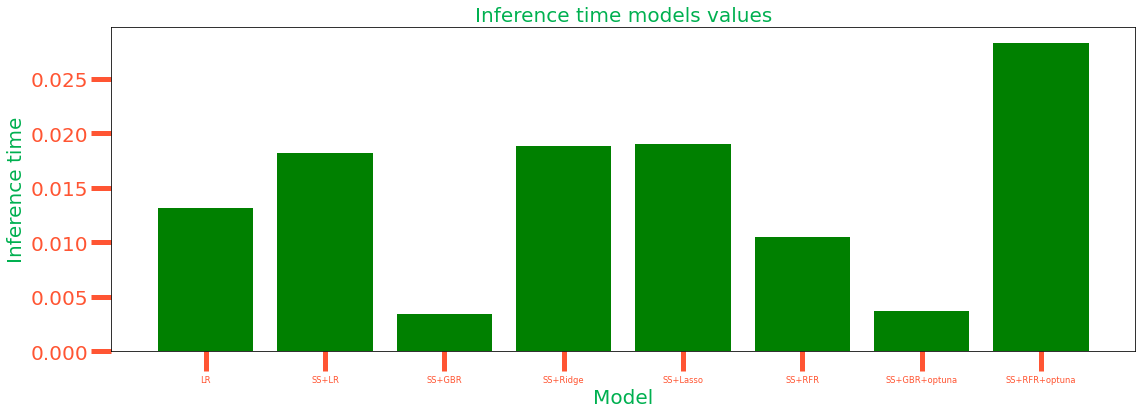

In [46]:
render_report(pd.DataFrame(learn_results))

In [60]:
pd.DataFrame(learn_results)

,model,rmse,mape,inference_time,best_params
0,LR,50186.138180,8.513278,0.013133,{}
1,SS+LR,50186.138180,8.513278,0.018207,"{'lr__fit_intercept': True, 'lr__normalize': T..."
2,SS+GBR,44443.827163,5.591638,0.003453,"{'gb__learning_rate': 0.1, 'gb__max_depth': 3,..."
3,SS+Ridge,48728.907026,7.548942,0.018819,{'ridge__alpha': 166.81005372000558}
4,SS+Lasso,48052.729839,6.909222,0.019032,{'lasso__alpha': 1291.5496650148827}
5,SS+RFR,48052.729839,6.909222,0.010505,"{'rf__max_depth': None, 'rf__min_samples_leaf'..."
6,SS+GBR+optuna,48985.080802,7.527157,0.003730,"{'n_estimators': 193, 'learning_rate': 0.19851..."
7,SS+RFR+optuna,48700.600118,6.584054,0.028295,"{'n_estimators': 169, 'max_depth': 19, 'min_sa..."
